
Name-Gaurav Pareek
Batch-DSG0223
Subject-Capstone Project EDA_ML

Phase 3                                                                                

Write the complete Machine learning code to make predictions of rental price and area .
Use appropriate models on their label basis. Remember you need to make 2 different predictions: rental price  and area   .

Apply all the best techniques of scaling ,hyperparameter tuning , avoid underfitting or overfitting (bias/variance)

At the end save the best model and convey on which basis you have chosen that model.  


Submission guidelines :


In [9]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic Numerical Computation Library in Python
import seaborn as sns # For Purpose of Visualization
import matplotlib.pyplot as plt # Plotting Package
import warnings 
warnings.filterwarnings('ignore') # Filtering warnings
%matplotlib inline

In [10]:
df=pd.read_csv('Real_estate_final_data.csv')

In [11]:
df.head()

,Unnamed: 0,SrNo,State_Code,Deposit,Country,Area,no_of_Bathroom,no_of_Bedroom,Address,Rental_price,City,Air_conditioning,Parking,Fireplace,Dishwasher,Hardwood_Floors,Roofdeck,Storage,Washer_Dryer,Pets_allowed
0,0,0,Jollyville,INR 92928,"TX, US",630 Sqft,1,1,"Austin, Jollyville, TX, US",INR 92928,Austin,No,No,No,No,No,No,No,No,No
1,1,1,TX,INR 67327,US,654 Sqft,1,1,"Austin, TX, US",INR 67327,Austin,No,No,No,No,No,No,No,No,No
2,2,2,Austin,INR 265984,"TX 78741, USA",1978 Sqft,2,3,"1513 Arcilla Street, Austin, TX 78741, USA",INR 265984,1513 Arcilla Street,No,No,No,No,No,No,No,No,No
3,3,3,Austin,INR 477940,"TX 78717, USA",5079 Sqft,4,5,"9979 Lavon Bend, Austin, TX 78717, USA",INR 477940,9979 Lavon Bend,No,No,No,No,No,No,No,No,No
4,4,4,Austin,INR 124680,"TX 78757, USA",576 Sqft,1,1,"7685 Northcross Drive, Austin, TX 78757, USA",INR 124680,7685 Northcross Drive,No,No,No,No,No,No,No,No,No


In [12]:
df['Rental_price']=df['Rental_price'].str.lstrip('INR')
df['Deposit']=df['Deposit'].str.lstrip('INR')
df['Area']=df['Area'].str.rstrip('Sqft')
df = df.rename({'Rental_price': 'Rental_price_INR', 'Deposit': 'Deposit_INR','Area': 'Area_Sqft'}, axis=1)


In [13]:
# drop unnecessary column
df=df.drop(['Unnamed: 0'],axis=1)

In [14]:
df.head()

,SrNo,State_Code,Deposit_INR,Country,Area_Sqft,no_of_Bathroom,no_of_Bedroom,Address,Rental_price_INR,City,Air_conditioning,Parking,Fireplace,Dishwasher,Hardwood_Floors,Roofdeck,Storage,Washer_Dryer,Pets_allowed
0,0,Jollyville,92928,"TX, US",630,1,1,"Austin, Jollyville, TX, US",92928,Austin,No,No,No,No,No,No,No,No,No
1,1,TX,67327,US,654,1,1,"Austin, TX, US",67327,Austin,No,No,No,No,No,No,No,No,No
2,2,Austin,265984,"TX 78741, USA",1978,2,3,"1513 Arcilla Street, Austin, TX 78741, USA",265984,1513 Arcilla Street,No,No,No,No,No,No,No,No,No
3,3,Austin,477940,"TX 78717, USA",5079,4,5,"9979 Lavon Bend, Austin, TX 78717, USA",477940,9979 Lavon Bend,No,No,No,No,No,No,No,No,No
4,4,Austin,124680,"TX 78757, USA",576,1,1,"7685 Northcross Drive, Austin, TX 78757, USA",124680,7685 Northcross Drive,No,No,No,No,No,No,No,No,No


In [15]:
df.shape

(6278, 19)

Null value check

In [16]:
df.isnull().sum()

SrNo                 0
State_Code           0
Deposit_INR          0
Country              0
Area_Sqft            0
no_of_Bathroom       0
no_of_Bedroom        0
Address              0
Rental_price_INR     0
City                 0
Air_conditioning     0
Parking              0
Fireplace            0
Dishwasher           0
Hardwood_Floors      0
Roofdeck             0
Storage              0
Washer_Dryer         0
Pets_allowed         0
dtype: int64

In [17]:
df.duplicated().sum()

0

Check for presence of any white spaces

In [18]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

 searching for string value in columns

In [19]:
df["no_of_Bathroom"].value_counts()

1    3195
2    1922
3     530
t     399
4     130
5      42
6      23
8      17
7      10
0       7
9       3
Name: no_of_Bathroom, dtype: int64

In [20]:
df["no_of_Bedroom"].value_counts()

2    1658
3    1593
1    1511
4     793
S     381
5     219
6      75
7      37
8       9
9       2
Name: no_of_Bedroom, dtype: int64

Removing text value in columns

In [21]:
df=df[~df["no_of_Bedroom"].str.contains("S")]

In [22]:
df=df[~df["no_of_Bathroom"].str.contains("t")]

In [23]:
#converting datatype
df["Deposit_INR"]=df["Deposit_INR"].astype(int)
df["Rental_price_INR"]=df["Deposit_INR"].astype(int)
df["no_of_Bedroom"]=df["no_of_Bedroom"].astype(int) 
df["no_of_Bathroom"]=df["no_of_Bathroom"].astype(int) 
df["Area_Sqft"]=df["Area_Sqft"].astype(int) 


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5721 entries, 0 to 6277
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SrNo               5721 non-null   int64 
 1   State_Code         5721 non-null   object
 2   Deposit_INR        5721 non-null   int32 
 3   Country            5721 non-null   object
 4   Area_Sqft          5721 non-null   int32 
 5   no_of_Bathroom     5721 non-null   int32 
 6   no_of_Bedroom      5721 non-null   int32 
 7   Address            5721 non-null   object
 8   Rental_price_INR   5721 non-null   int32 
 9   City               5721 non-null   object
 10  Air_conditioning   5721 non-null   object
 11  Parking            5721 non-null   object
 12  Fireplace          5721 non-null   object
 13  Dishwasher         5721 non-null   object
 14  Hardwood_Floors    5721 non-null   object
 15  Roofdeck           5721 non-null   object
 16  Storage            5721 non-null   object


In [ ]:
# We have only 5 neumerical features - Deposit_INR, Area_Sqft,no_of_Bathroom,no_of_Bedroom , Rental_price_INR 
# others are categorical
# Target Feature =======>>>>>> Rental_price_INR  and Area_Sqft>>>>>>
# Price in lakh

In [ ]:
Missing value check

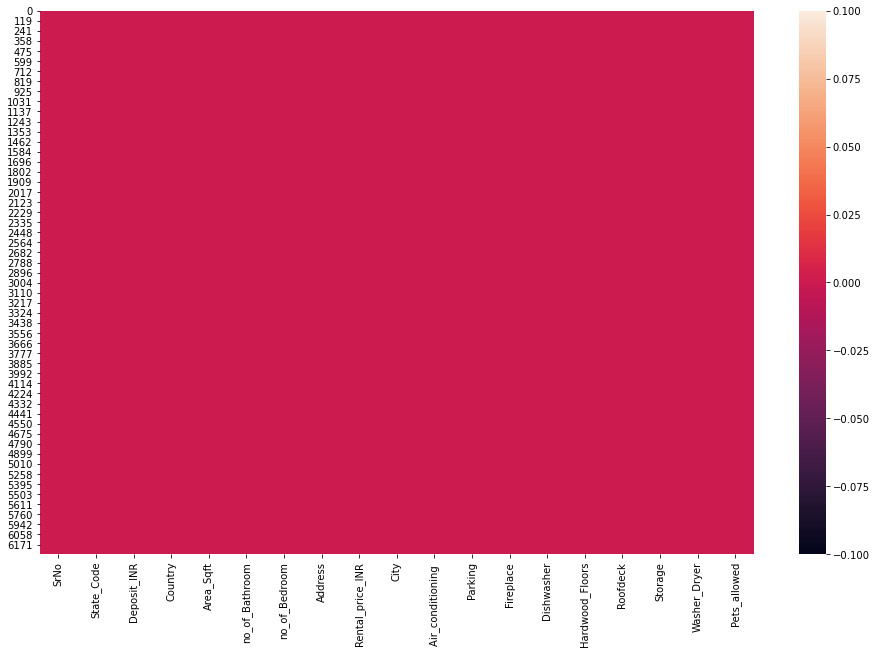

In [25]:
sns.set_palette('coolwarm_r')
plt.figure(figsize = (16,10))
sns.heatmap(df.isnull())
plt.show()

In [26]:
# Finding what percentage of data is missing from dataset
pd.set_option('display.max_rows',None) 
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
SrNo                            0             0.0
Air_conditioning                0             0.0
Washer_Dryer                    0             0.0
Storage                         0             0.0
Roofdeck                        0             0.0
Hardwood_Floors                 0             0.0
Dishwasher                      0             0.0
Fireplace                       0             0.0
Parking                         0             0.0
City                            0             0.0
State_Code                      0             0.0
Rental_price_INR                0             0.0
Address                         0             0.0
no_of_Bedroom                   0             0.0
no_of_Bathroom                  0             0.0
Area_Sqft                       0             0.0
Country                         0             0.0
Deposit_INR                     0             0.0
Pets_allowed                    0             0.0


 No Missing value present in Training Dataset

Statistical Matrix

In [27]:
df.describe().round().T.style.background_gradient(subset = ['mean','std','count'], cmap = 'gist_earth')

,count,mean,std,min,25%,50%,75%,max
SrNo,5721.000000,3042.000000,1773.000000,0.000000,1520.000000,3002.000000,4493.000000,6277.000000
Deposit_INR,5721.000000,326216.000000,407613.000000,1.000000,149616.000000,217752.000000,349104.000000,9744989.000000
Area_Sqft,5721.000000,1444.000000,2925.000000,0.000000,658.000000,1054.000000,1649.000000,55414.000000
no_of_Bathroom,5721.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000,9.000000
no_of_Bedroom,5721.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,9.000000
Rental_price_INR,5721.000000,326216.000000,407613.000000,1.000000,149616.000000,217752.000000,349104.000000,9744989.000000


In [28]:
df.describe(include=object).style.background_gradient(cmap='gist_summer_r')

,State_Code,Country,Address,City,Air_conditioning,Parking,Fireplace,Dishwasher,Hardwood_Floors,Roofdeck,Storage,Washer_Dryer,Pets_allowed
count,5721,5721,5721,5721,5721,5721,5721,5721,5721,5721,5721,5721,5721
unique,1304,964,4224,3886,1,2,2,2,2,1,2,1,2
top,Las Vegas,Germany,"Fremantle, City of Fremantle, Australia",Vancouver,No,No,No,No,No,No,No,No,No
freq,456,740,61,62,5721,4418,5445,4498,5602,5721,5626,5721,5719


 Feature Engineering

Drop Unwanted Columns


In [29]:
df.head()

,SrNo,State_Code,Deposit_INR,Country,Area_Sqft,no_of_Bathroom,no_of_Bedroom,Address,Rental_price_INR,City,Air_conditioning,Parking,Fireplace,Dishwasher,Hardwood_Floors,Roofdeck,Storage,Washer_Dryer,Pets_allowed
0,0,Jollyville,92928,"TX, US",630,1,1,"Austin, Jollyville, TX, US",92928,Austin,No,No,No,No,No,No,No,No,No
1,1,TX,67327,US,654,1,1,"Austin, TX, US",67327,Austin,No,No,No,No,No,No,No,No,No
2,2,Austin,265984,"TX 78741, USA",1978,2,3,"1513 Arcilla Street, Austin, TX 78741, USA",265984,1513 Arcilla Street,No,No,No,No,No,No,No,No,No
3,3,Austin,477940,"TX 78717, USA",5079,4,5,"9979 Lavon Bend, Austin, TX 78717, USA",477940,9979 Lavon Bend,No,No,No,No,No,No,No,No,No
4,4,Austin,124680,"TX 78757, USA",576,1,1,"7685 Northcross Drive, Austin, TX 78757, USA",124680,7685 Northcross Drive,No,No,No,No,No,No,No,No,No


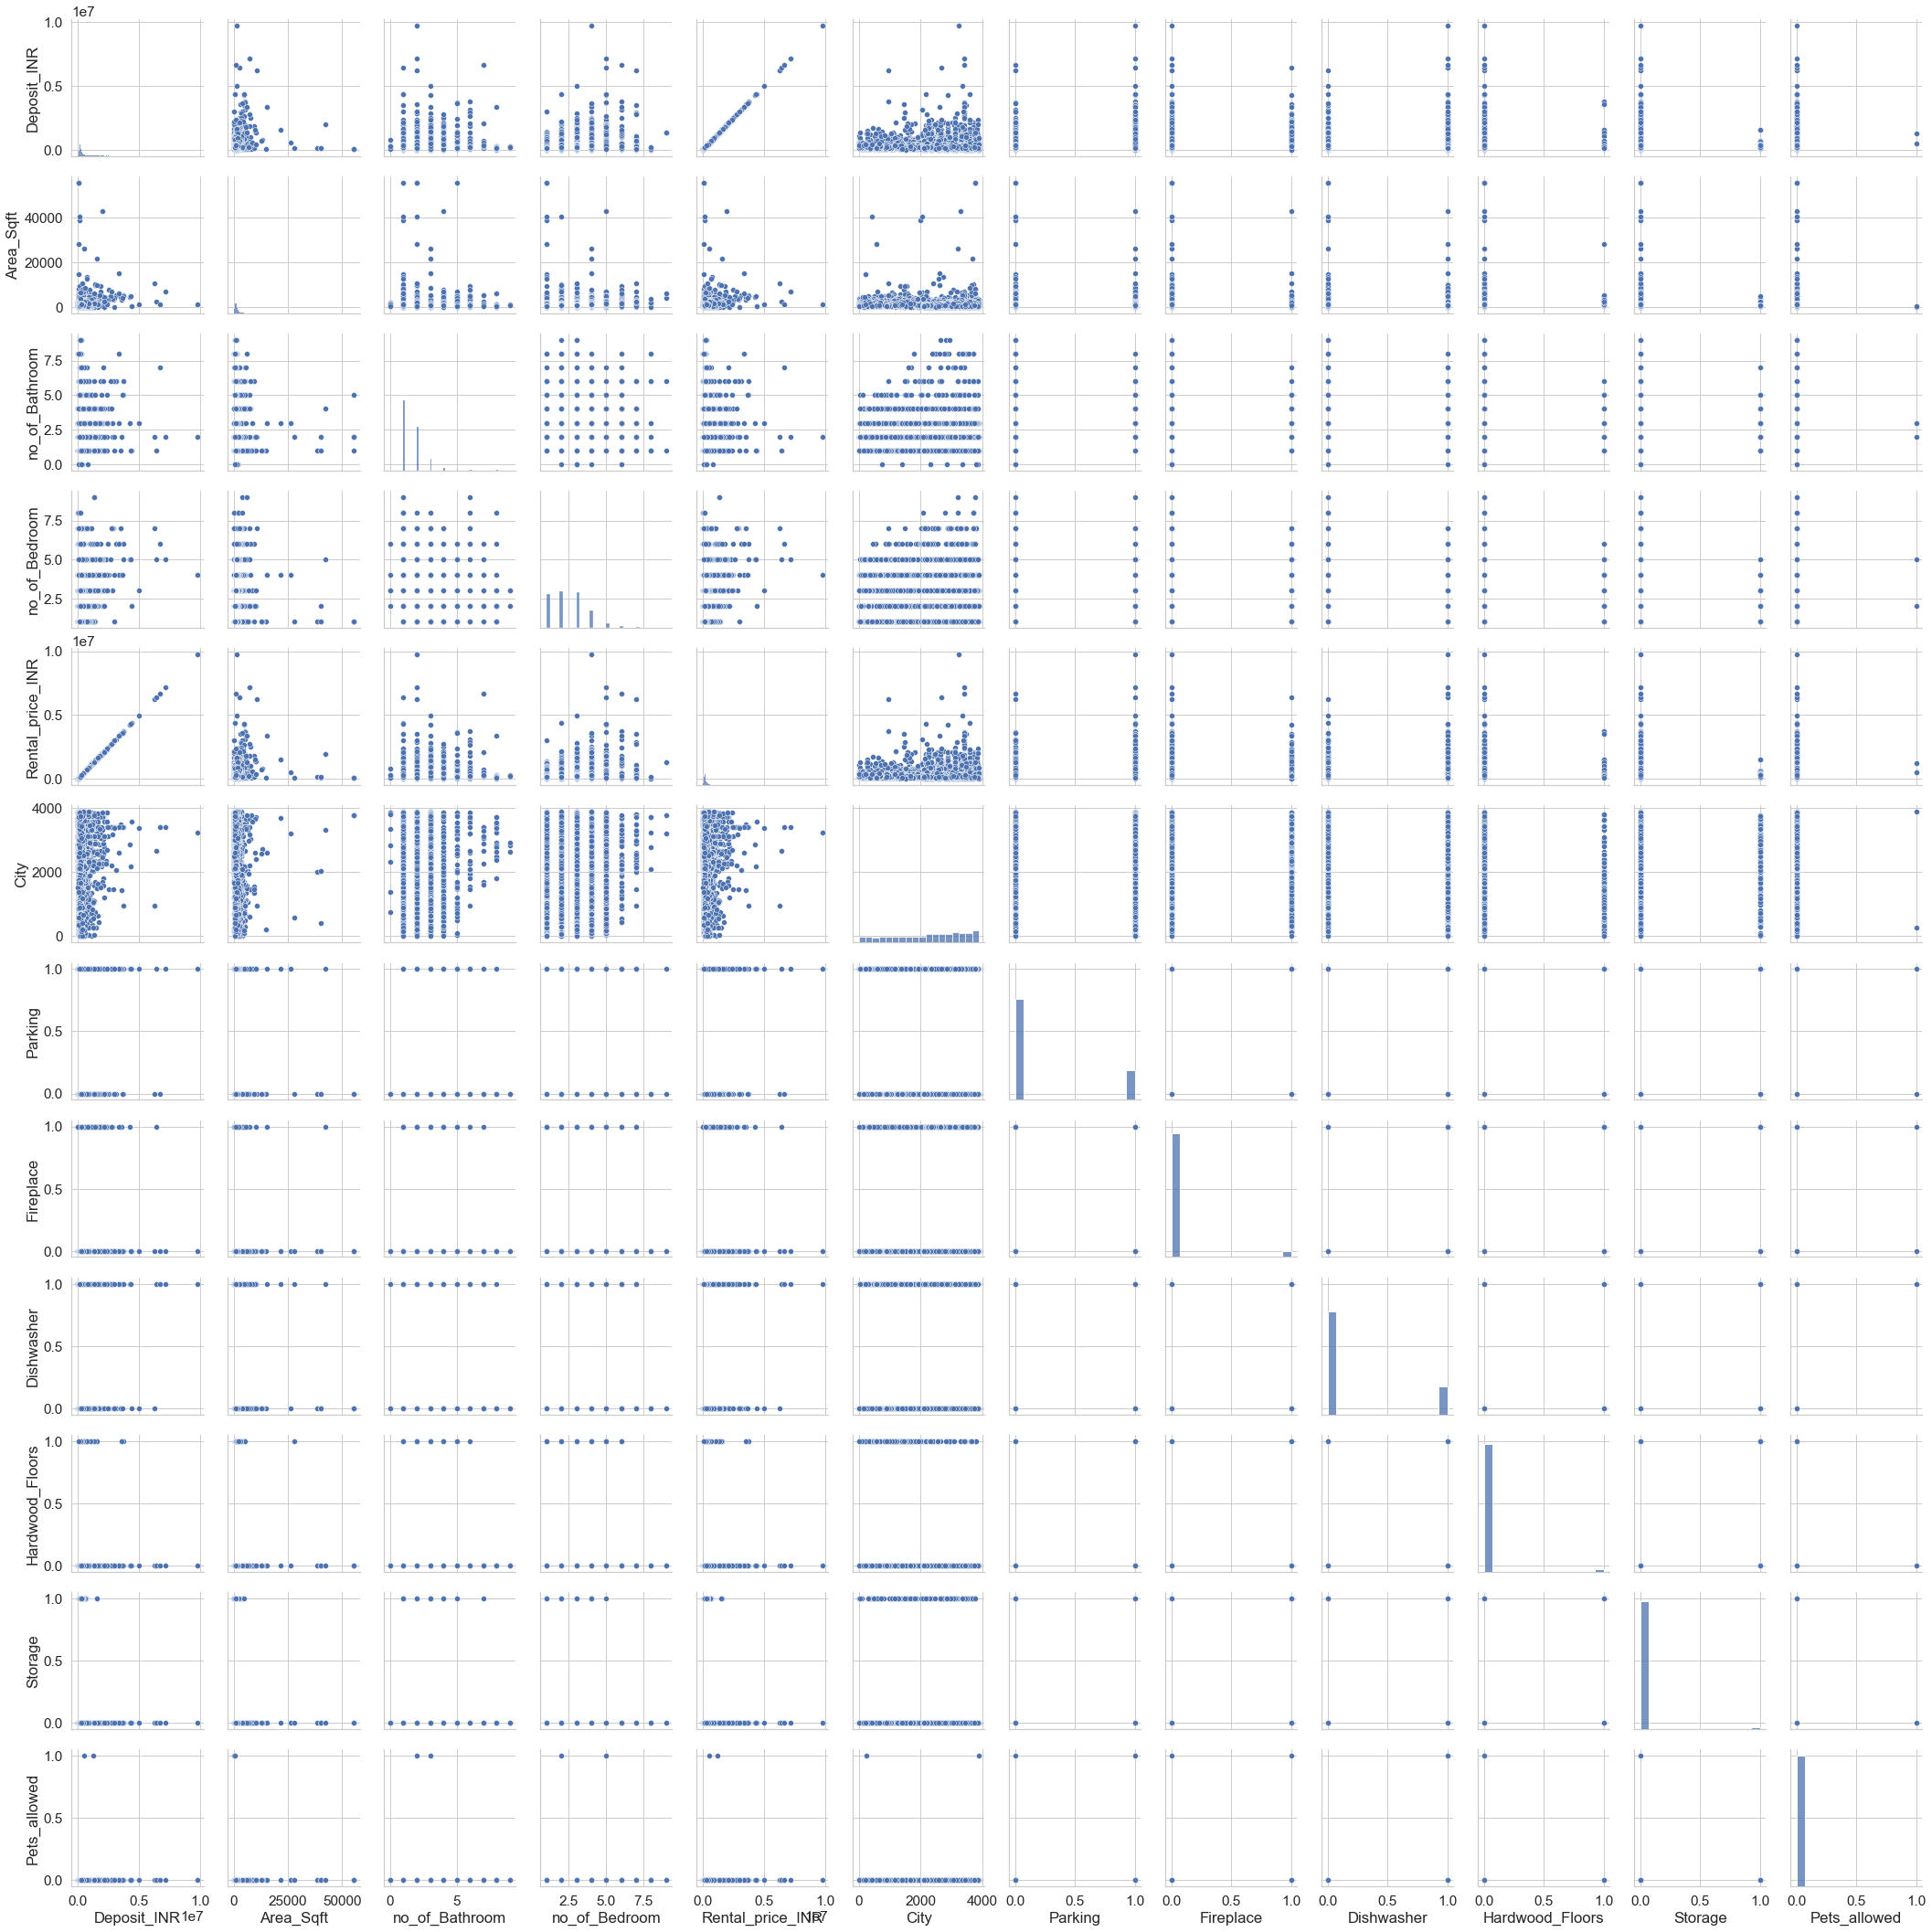

In [162]:
sns.pairplot(df)

<AxesSubplot:>

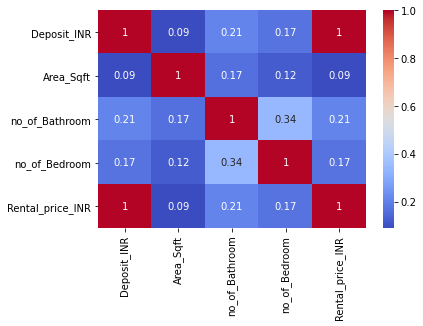

In [32]:
# correlation heatmap
num_vars = ["Deposit_INR", "Area_Sqft", "no_of_Bathroom",'no_of_Bedroom','Rental_price_INR']
sns.heatmap(df[num_vars].corr(),cmap="coolwarm", annot=True)

Data cleaning

******* Deposit_INR *******


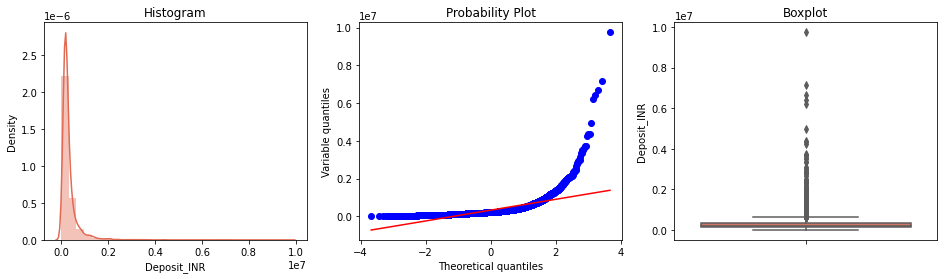

******* Area_Sqft *******


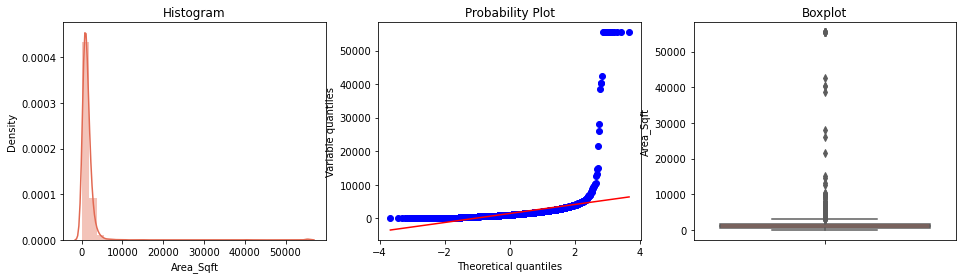

******* no_of_Bathroom *******


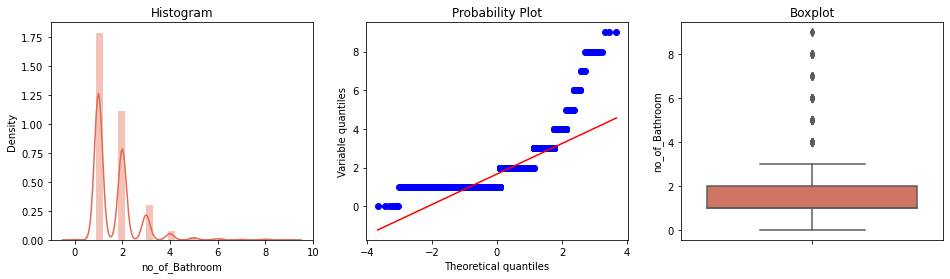

******* no_of_Bedroom *******


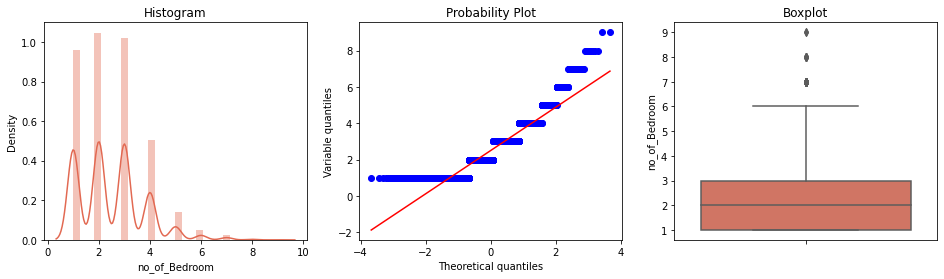

******* Rental_price_INR *******


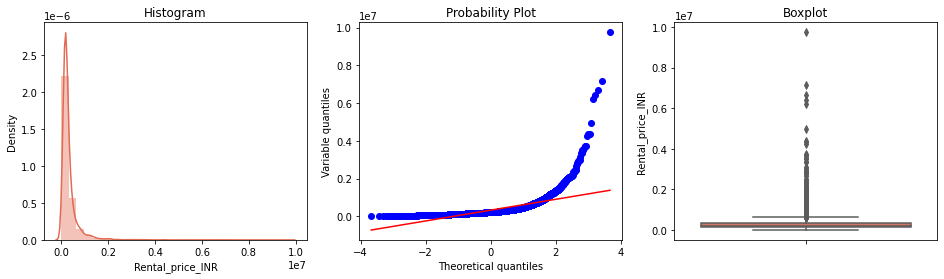

In [33]:
"""## Finding Outlier and Removing"""
 
# function to create histogram, Q-Q plot and boxplot
 
# for Q-Q plots
import scipy.stats as stats
 
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments
 
    # define figure size
    plt.figure(figsize=(16, 4))
 
    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')
 
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
 
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
 
    plt.show()
 
num_var = ["Deposit_INR", "Area_Sqft", "no_of_Bathroom",'no_of_Bedroom','Rental_price_INR']
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(df, var)

In [ ]:
 # here we observe outlier using histogram,, qq plot and boxplot

In [34]:
num_var = ["Deposit_INR", "Area_Sqft", "no_of_Bathroom",'no_of_Bedroom','Rental_price_INR']

In [35]:
# Splitting the dataset into Categorical and Numerical

cat_col=[]

for i in df.columns:
    if df[i].dtypes == 'object':
        cat_col.append(i)
        
num_col=[]

for i in df.columns:
    if df[i].dtypes == 'int':
        num_col.append(i)
        

In [36]:
cat_col

['State_Code',
 'Country',
 'Address',
 'City',
 'Air_conditioning ',
 'Parking',
 'Fireplace',
 'Dishwasher',
 'Hardwood_Floors',
 'Roofdeck',
 'Storage',
 'Washer_Dryer',
 'Pets_allowed']

In [37]:
num_col

['Deposit_INR',
 'Area_Sqft',
 'no_of_Bathroom',
 'no_of_Bedroom',
 'Rental_price_INR']

In [39]:
#Checking the statistical summary
df.describe(include='object')

,State_Code,Country,Address,City,Air_conditioning,Parking,Fireplace,Dishwasher,Hardwood_Floors,Roofdeck,Storage,Washer_Dryer,Pets_allowed
count,5721,5721,5721,5721,5721,5721,5721,5721,5721,5721,5721,5721,5721
unique,1304,964,4224,3886,1,2,2,2,2,1,2,1,2
top,Las Vegas,Germany,"Fremantle, City of Fremantle, Australia",Vancouver,No,No,No,No,No,No,No,No,No
freq,456,740,61,62,5721,4418,5445,4498,5602,5721,5626,5721,5719


In [40]:
df.describe()

,SrNo,Deposit_INR,Area_Sqft,no_of_Bathroom,no_of_Bedroom,Rental_price_INR
count,5721.000000,5.721000e+03,5721.000000,5721.000000,5721.000000,5.721000e+03
mean,3042.023597,3.262161e+05,1443.874672,1.665793,2.492222,3.262161e+05
std,1773.261851,4.076127e+05,2925.226278,0.954470,1.264351,4.076127e+05
min,0.000000,1.000000e+00,0.000000,0.000000,1.000000,1.000000e+00
25%,1520.000000,1.496160e+05,658.000000,1.000000,1.000000,1.496160e+05
50%,3002.000000,2.177520e+05,1054.000000,1.000000,2.000000,2.177520e+05
75%,4493.000000,3.491040e+05,1649.000000,2.000000,3.000000,3.491040e+05
max,6277.000000,9.744989e+06,55414.000000,9.000000,9.000000,9.744989e+06


The mean of 'Deposit_INR' ,'Area_Sqft','no_of_Bathroom','no_of_Bedroom','Rental_price_INR' column is higher than the 50% 
(median) of that column indicating the columns are right skewed. . The difference between 75% and 
max value in 'v','Latitude','Area_Sqft'  'no_of_Bathroom','no_of_Bedroom','Rental_price_INR' is very high indicatng the presence 
of outliers. Sr. no is unnecessary column so better to delete this column.

In [41]:
# drop unnecessary column
df.drop(columns=['SrNo'], inplace =  True)

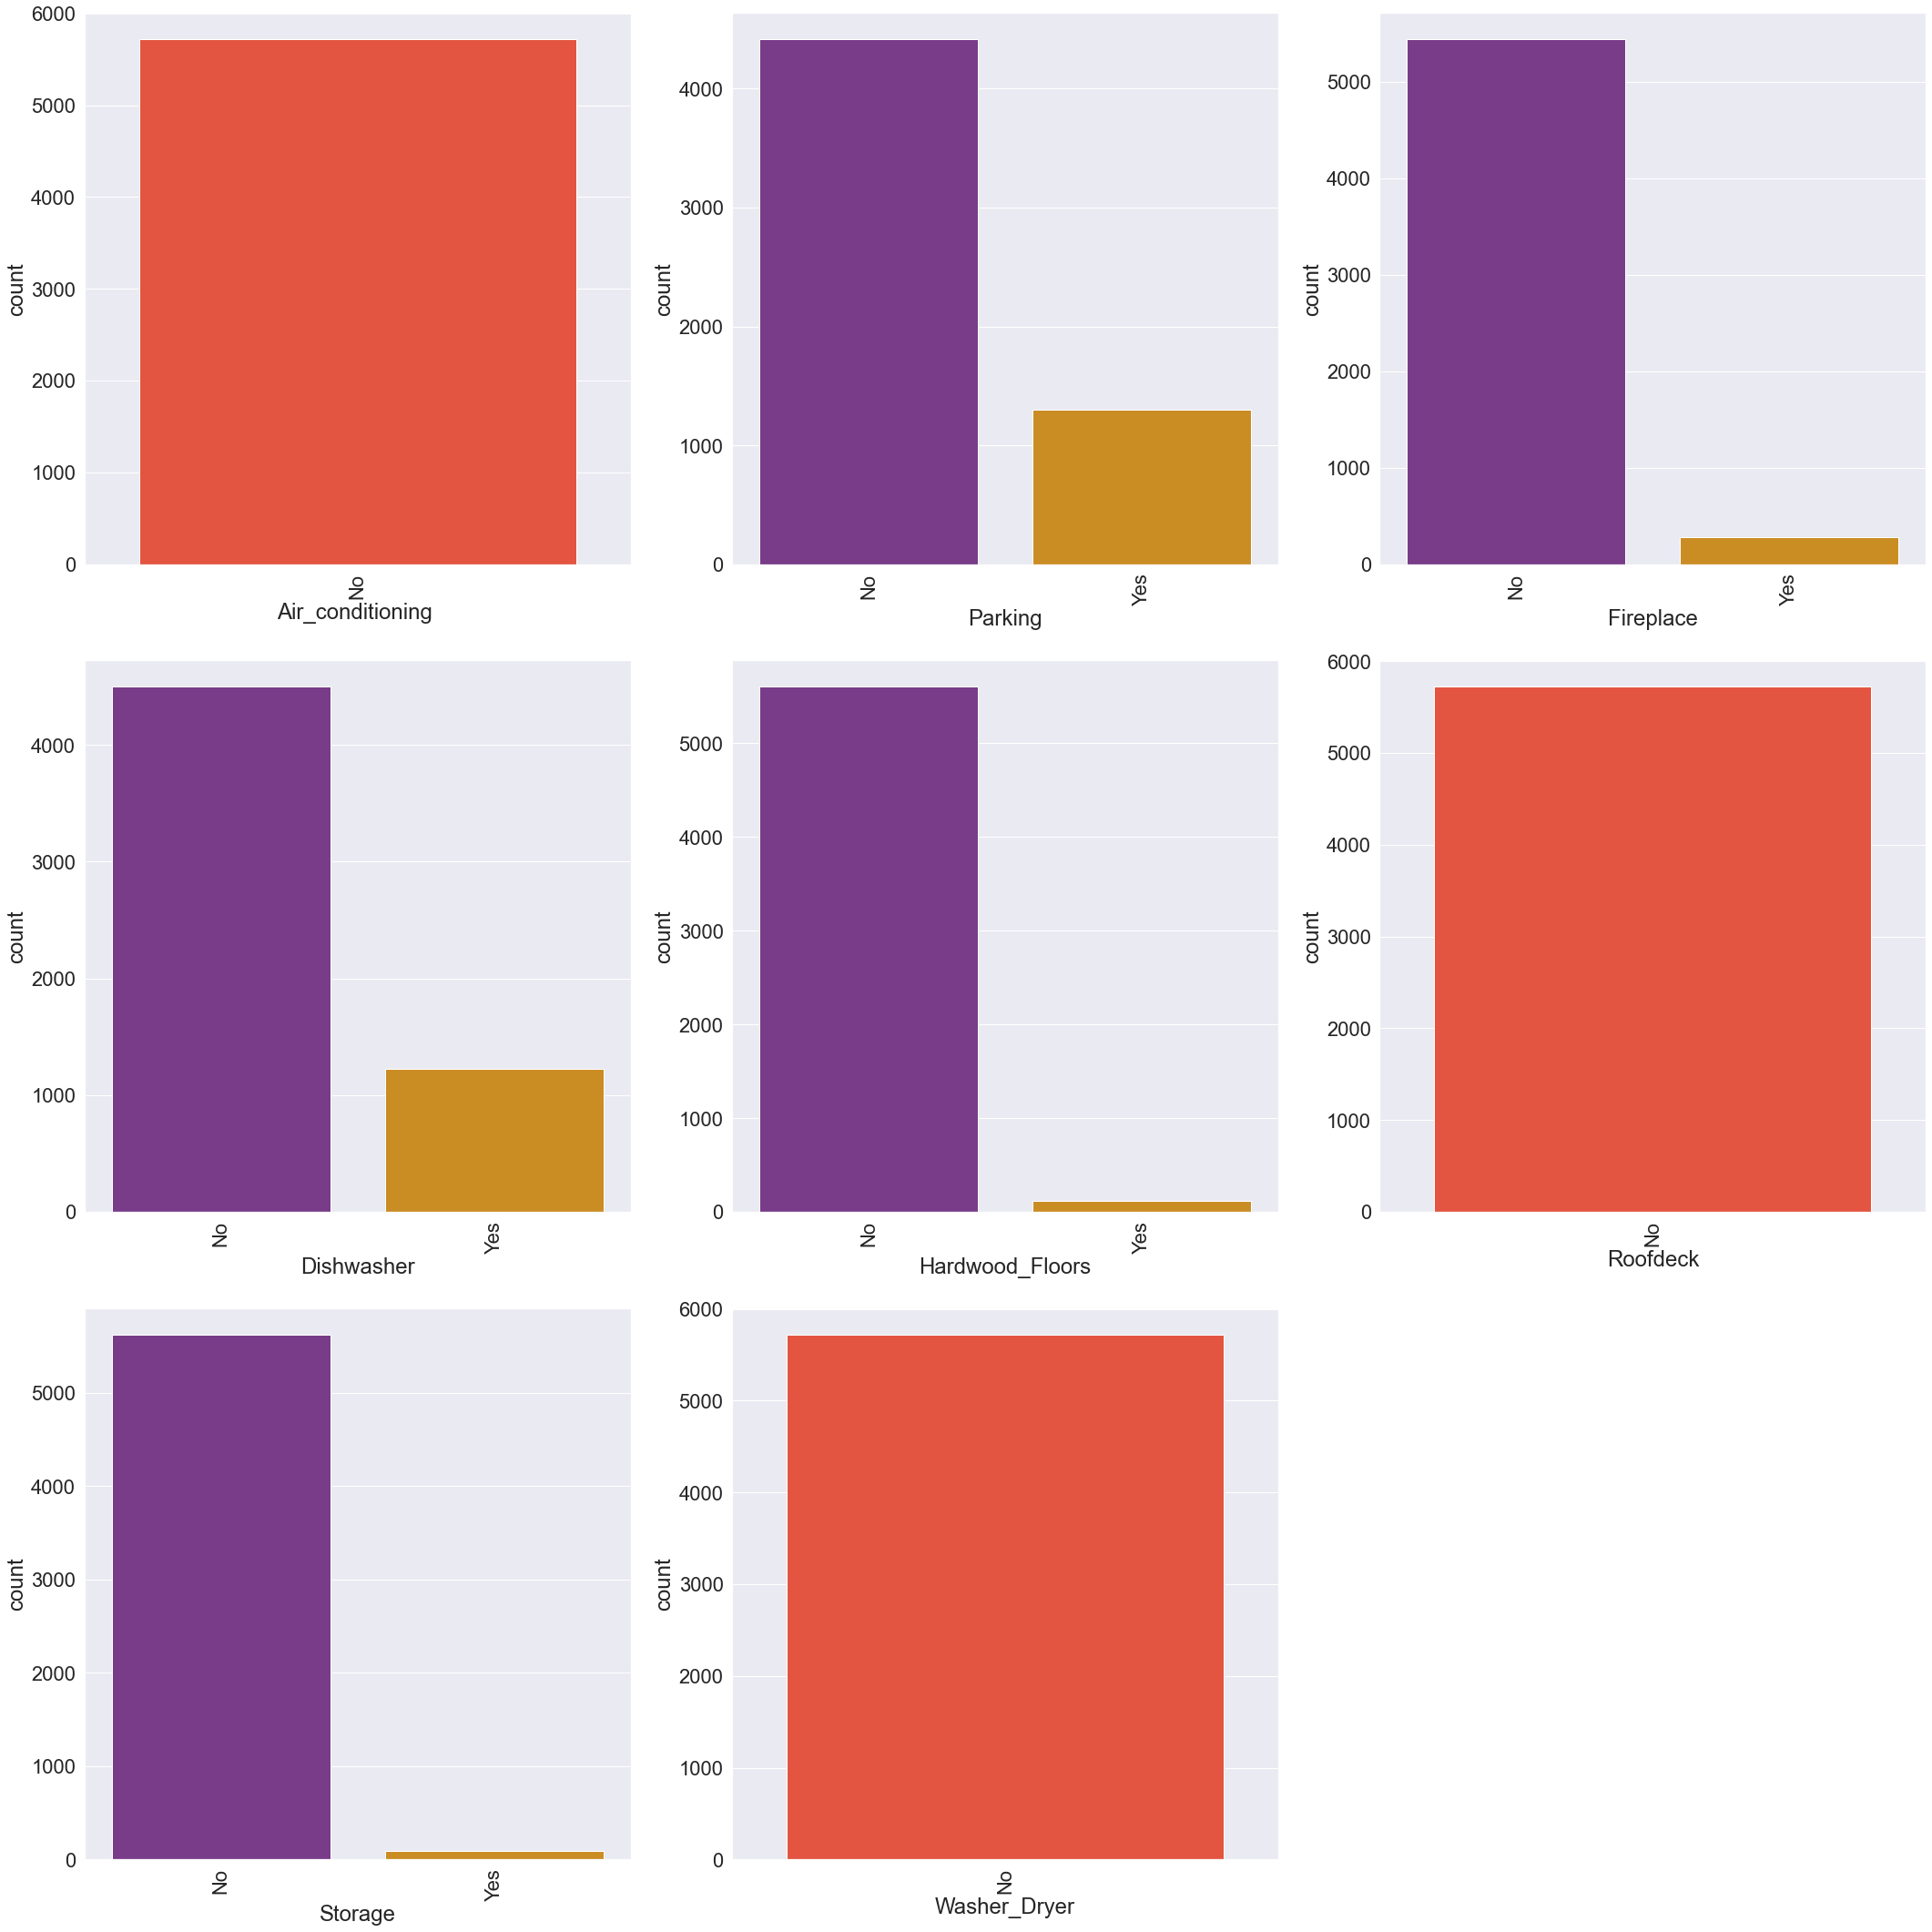

In [42]:
plt.figure(figsize=(30,30))
sns.set(font_scale=2)
p=1
for i in cat_col[4:]:
    if p<=8:
        ax=plt.subplot(3,3,p)
        sns.countplot(x=df[i],palette='CMRmap')
        plt.xticks(rotation=90)
        p+=1
plt.tight_layout()

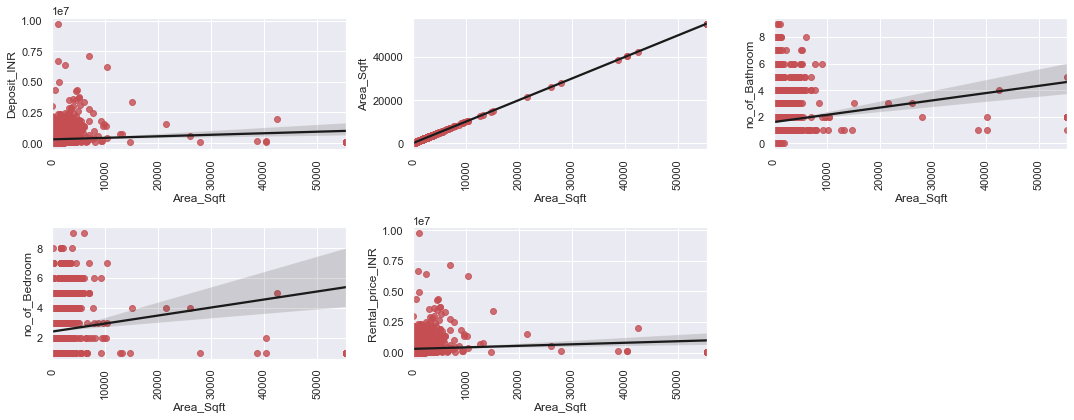

In [43]:
p=1
plt.figure(figsize=(15,6))
sns.set(font_scale=1)
for i in num_col[0:]:
    if p<=5:
        ax=plt.subplot(2,3,p)
        sns.regplot(x='Area_Sqft',y=df[i],scatter_kws=dict(color='r'),line_kws=dict(color='k'),data=df)
        plt.xticks(rotation=90)
        p+=1
plt.tight_layout()

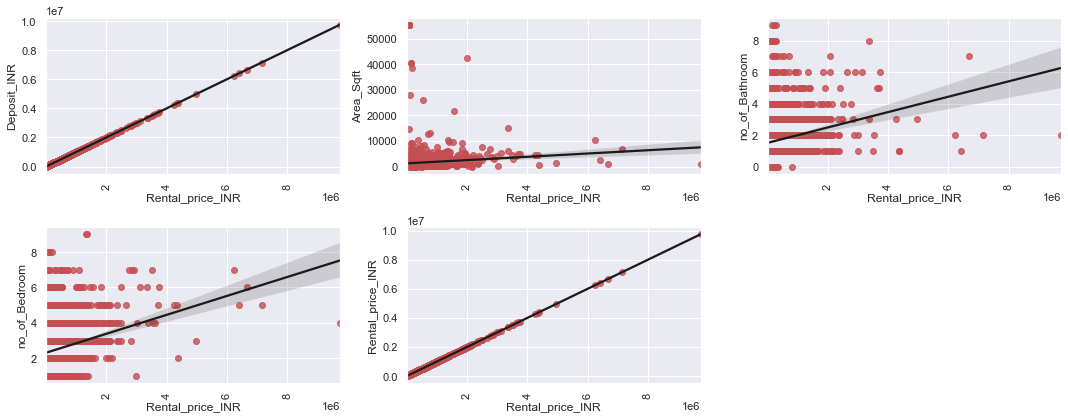

In [44]:
p=1
plt.figure(figsize=(15,6))
sns.set(font_scale=1)
for i in num_col[0:]:
    if p<=5:
        ax=plt.subplot(2,3,p)
        sns.regplot(x='Rental_price_INR',y=df[i],scatter_kws=dict(color='r'),line_kws=dict(color='k'),data=df)
        plt.xticks(rotation=90)
        p+=1
plt.tight_layout()

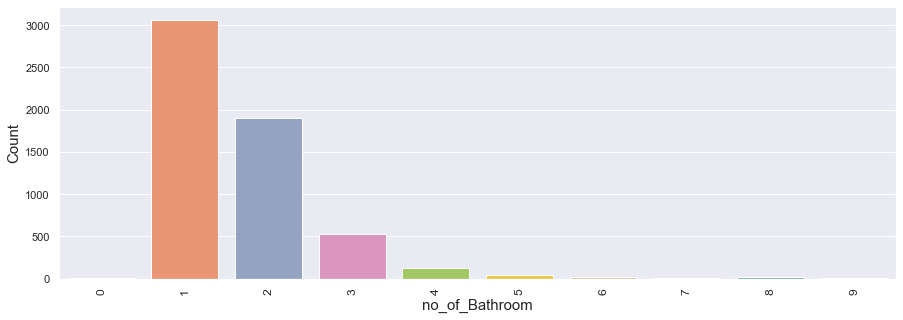

In [45]:
# Visualizing the feature 'no_of_Bathroom' in countplot

plt.figure(figsize=(15,5))
ab = sns.countplot(x =df['no_of_Bathroom'],palette='Set2')
plt.ylabel('Count',fontsize=15)
plt.xlabel('no_of_Bathroom',fontsize=15)
plt.xticks(fontsize=12,rotation=90)

#for i in ab.containers:
    #ab.bar_label(i,fontsize=12)
plt.show()

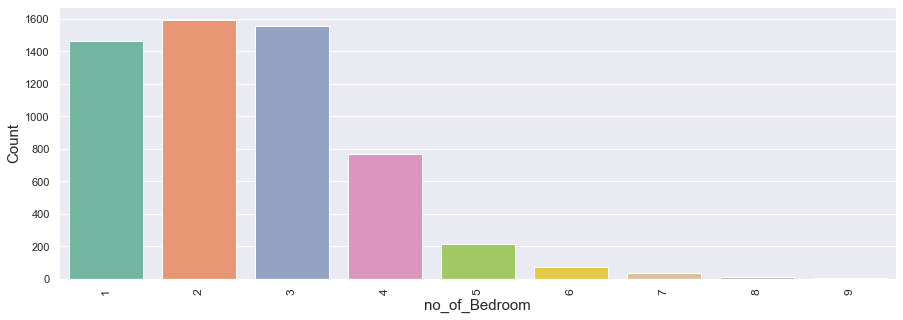

In [46]:
# Visualizing the feature 'no_of_Bedroom' in countplot

plt.figure(figsize=(15,5))
ab = sns.countplot(x =df['no_of_Bedroom'],palette='Set2')
plt.ylabel('Count',fontsize=15)
plt.xlabel('no_of_Bedroom',fontsize=15)
plt.xticks(fontsize=12,rotation=90)

#for i in ab.containers:
    #ab.bar_label(i,fontsize=12)
plt.show()

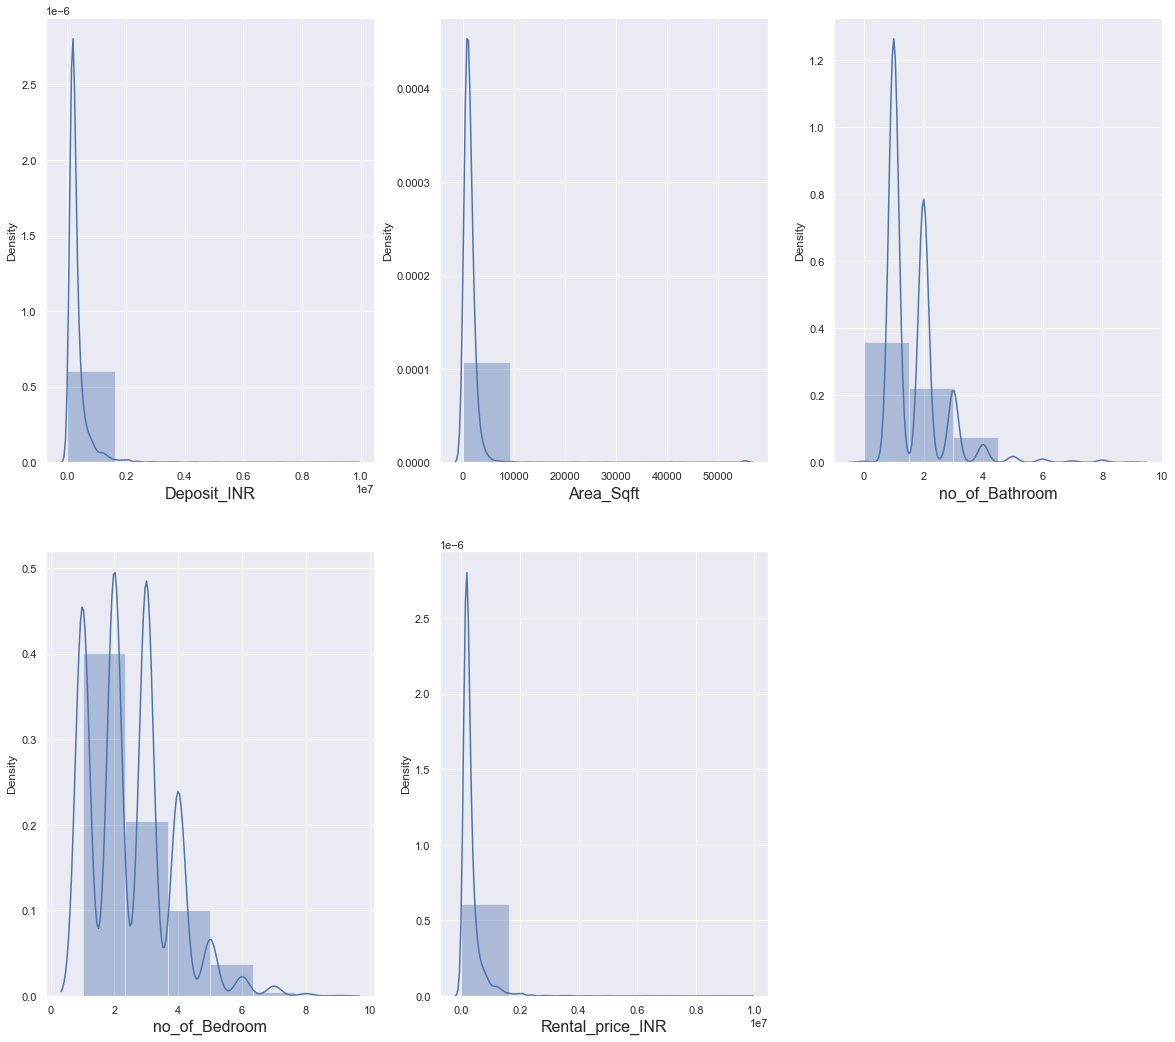

In [47]:
plotnumber = 1
plt.figure(figsize=(20,18))

for i in num_col:
    if plotnumber<=5:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df[i],bins =6,kde=True)
        plt.xlabel(i,fontsize=16)
        plotnumber+=1
plt.show()

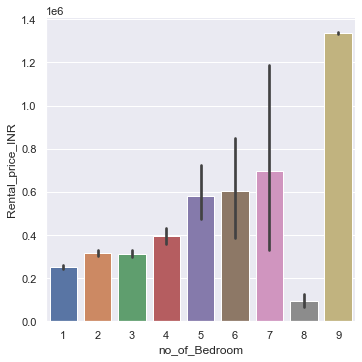

In [48]:
sns.catplot(y='Rental_price_INR',x='no_of_Bedroom',data=df,kind='bar')

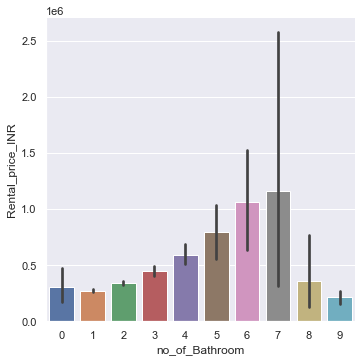

In [49]:
sns.catplot(y='Rental_price_INR',x='no_of_Bathroom',data=df,kind='bar')

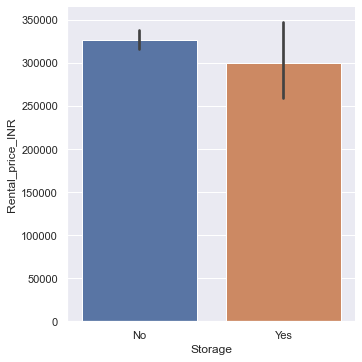

In [50]:
sns.catplot(y='Rental_price_INR',x='Storage',data=df,kind='bar')

In [51]:
cat_col


['State_Code',
 'Country',
 'Address',
 'City',
 'Air_conditioning ',
 'Parking',
 'Fireplace',
 'Dishwasher',
 'Hardwood_Floors',
 'Roofdeck',
 'Storage',
 'Washer_Dryer',
 'Pets_allowed']

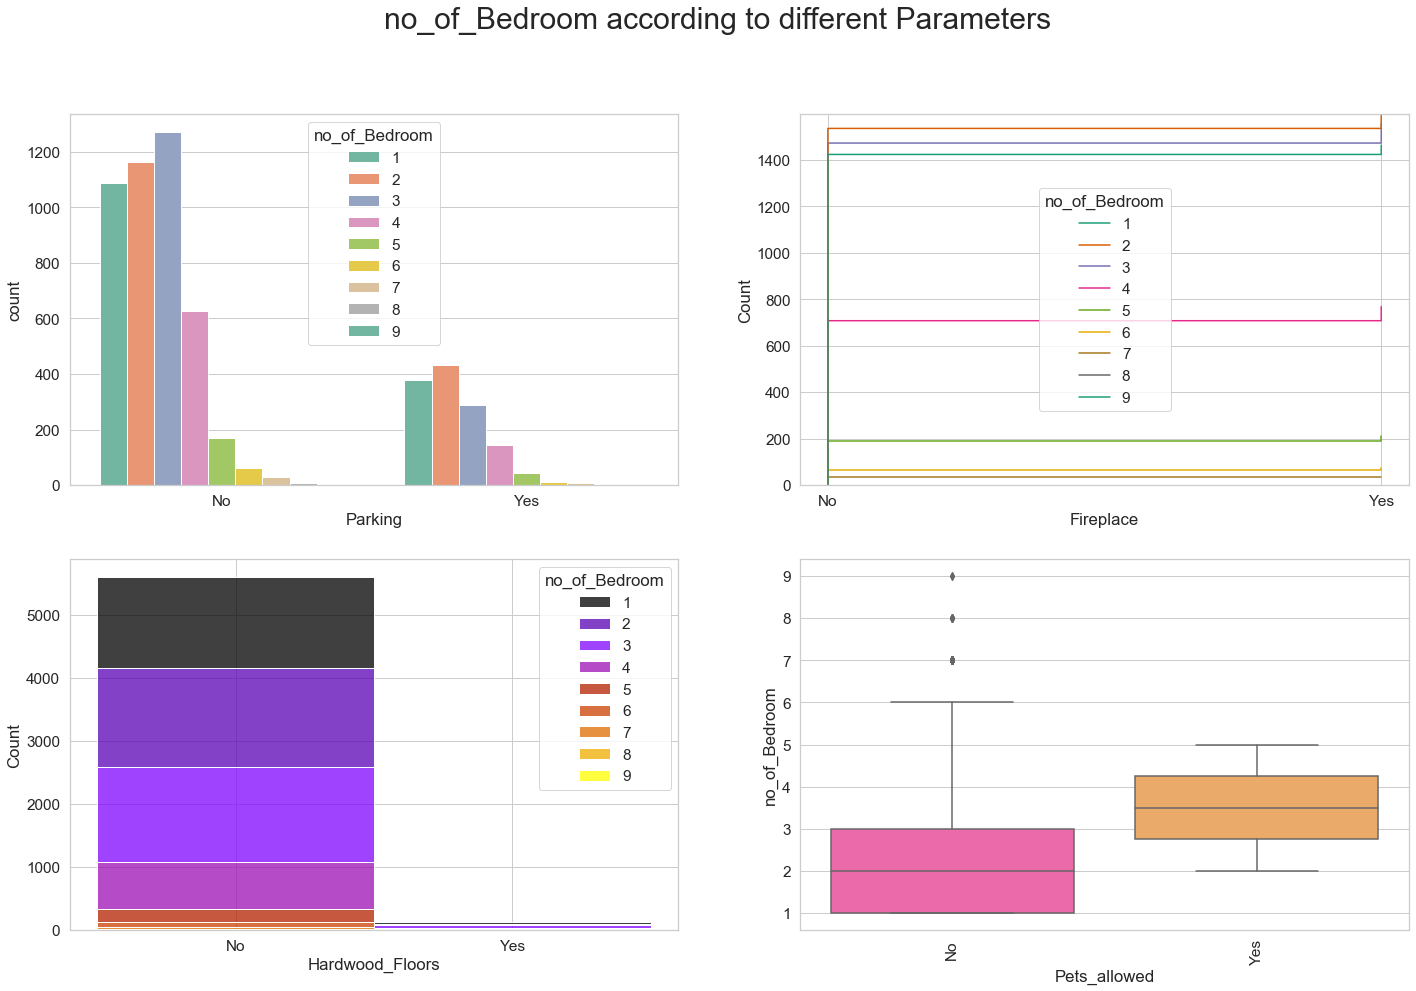

In [52]:
sns.set(font_scale=1.4)
sns.set_style('whitegrid')
fig,axes = plt.subplots(2, 2, figsize=(24,15))
fig.suptitle('no_of_Bedroom according to different Parameters',fontsize=30) 
sns.countplot(ax=axes[0, 0],x='Parking',hue='no_of_Bedroom',data=df,palette="Set2") 
sns.ecdfplot(ax=axes[0, 1],x='Fireplace',hue='no_of_Bedroom', data=df,palette="Dark2",stat='count')
sns.histplot(ax=axes[1, 0],x='Hardwood_Floors',hue='no_of_Bedroom',data=df,palette="gnuplot",multiple='stack')
sns.boxplot(ax=axes[1, 1],x='Pets_allowed',y='no_of_Bedroom',data=df,palette="spring")
plt.xticks(rotation=90)
plt.show()

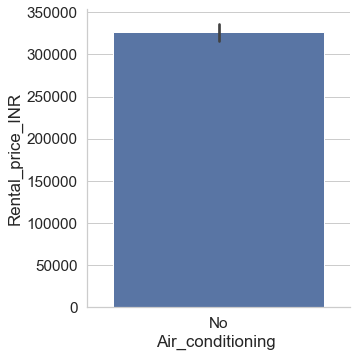

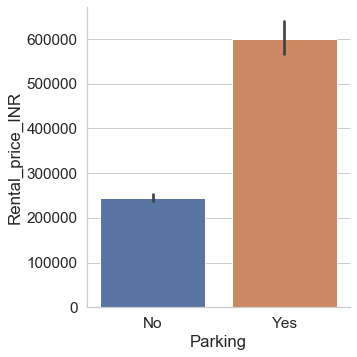

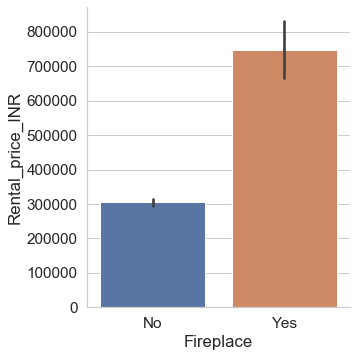

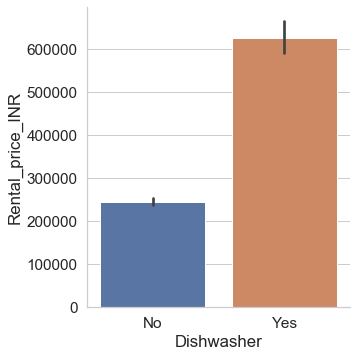

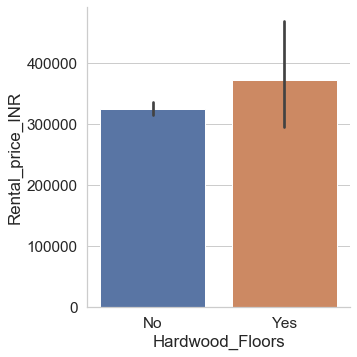

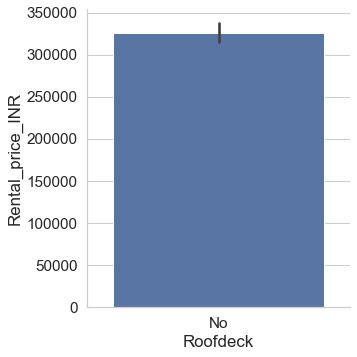

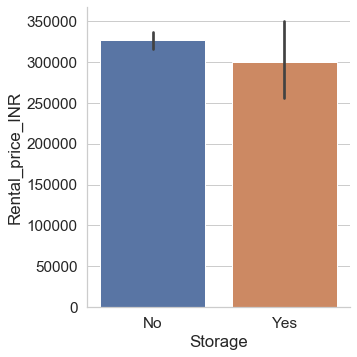

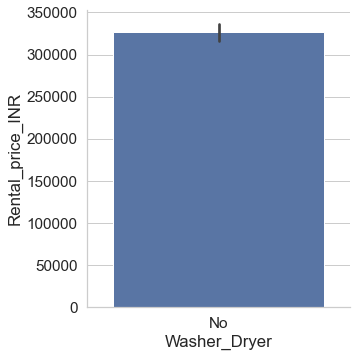

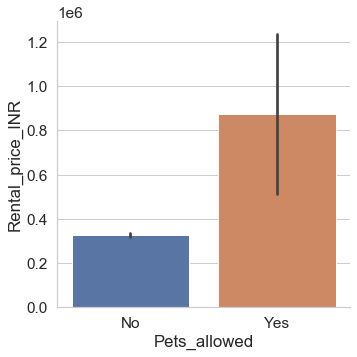

In [53]:
cols = ['Air_conditioning ','Parking','Fireplace','Dishwasher','Hardwood_Floors','Roofdeck','Storage','Washer_Dryer','Pets_allowed']
for i in cols:
    sns.catplot(x= i,y='Rental_price_INR',data=df,kind='bar')

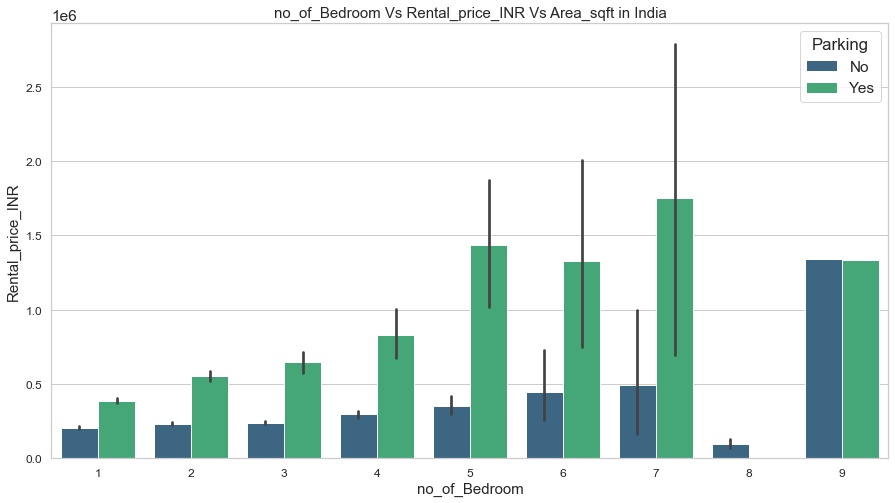

In [54]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in India by barplot


#filter = df[df['Country']=='India']
plt.figure(figsize=(15,8))
cat=sns.barplot(data=df, x='no_of_Bedroom',y='Rental_price_INR',hue='Parking',palette='viridis')
plt.xlabel("no_of_Bedroom",fontsize=15)
plt.ylabel("Rental_price_INR",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('no_of_Bedroom Vs Rental_price_INR Vs Area_sqft in India',fontsize=15)

#for i in cat.containers:
    #cat.bar_label(i,fontsize=10,padding=20,rotation=60)
plt.show()

In [79]:
#dropping unnecessary columns like Air_conditioning ,Roofdeck, Washer_Dryer as they have only 1 value

#df.drop(columns=['Roofdeck'], inplace =  True)
#df.drop(columns=['Washer_Dryer'], inplace =  True)
#df.drop(columns=['Air_conditioning '], inplace =  True)
df.drop(columns=['Address','Country','State_Code'], inplace =  True)


In [163]:
df.head()

,Deposit_INR,Area_Sqft,no_of_Bathroom,no_of_Bedroom,Rental_price_INR,City,Parking,Fireplace,Dishwasher,Hardwood_Floors,Storage,Pets_allowed
0,92928,630,1,1,92928,2193,0,0,0,0,0,0
1,67327,654,1,1,67327,2193,0,0,0,0,0,0
2,265984,1978,2,3,265984,409,0,0,0,0,0,0
3,477940,5079,4,5,477940,2087,0,0,0,0,0,0
4,124680,576,1,1,124680,1765,0,0,0,0,0,0


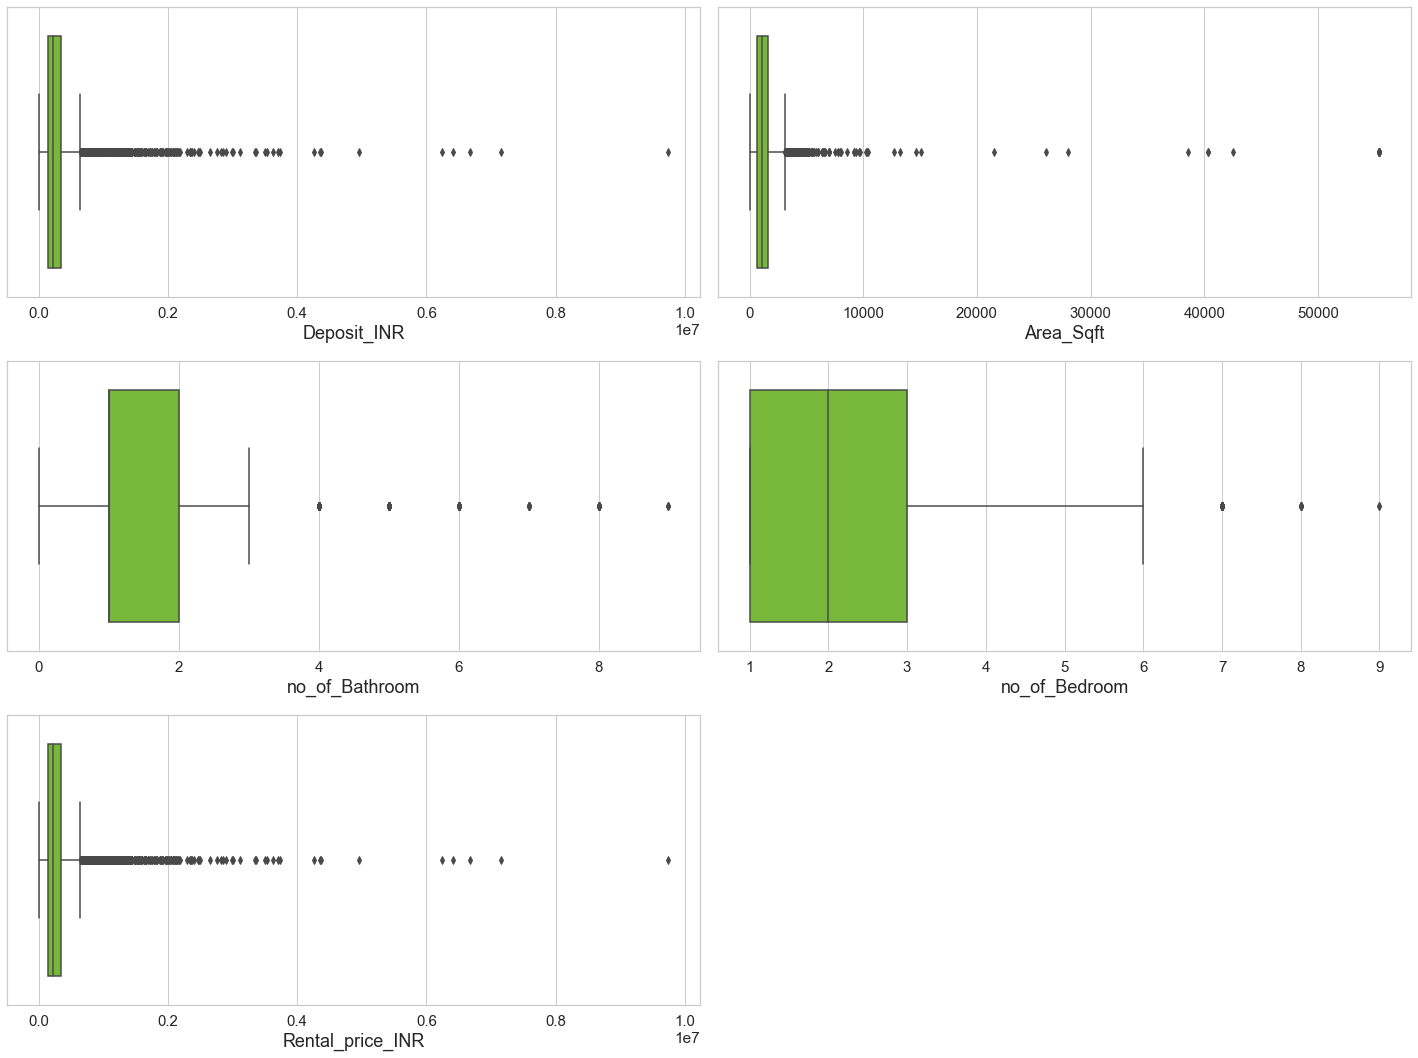

In [81]:
# Visualizing the dataset with Boxplot to check outliers

plt.figure(figsize=(20,15))
st = 1
for i in num_col:
    if st <=6:
        sub = plt.subplot(3,2,st)
        sns.boxplot(df[i],color='#76cd26')
        plt.xlabel(i,fontsize=18)
        plt.xticks(fontsize=15)
    st+=1
plt.tight_layout()

In [82]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in df.columns:
    if (df[i].dtypes == 'object'):
        df[i] = le.fit_transform(df[i].values.reshape(-1,1))
df.head(5)

,Deposit_INR,Area_Sqft,no_of_Bathroom,no_of_Bedroom,Rental_price_INR,City,Parking,Fireplace,Dishwasher,Hardwood_Floors,Storage,Pets_allowed
0,92928,630,1,1,92928,2193,0,0,0,0,0,0
1,67327,654,1,1,67327,2193,0,0,0,0,0,0
2,265984,1978,2,3,265984,409,0,0,0,0,0,0
3,477940,5079,4,5,477940,2087,0,0,0,0,0,0
4,124680,576,1,1,124680,1765,0,0,0,0,0,0


<AxesSubplot:>

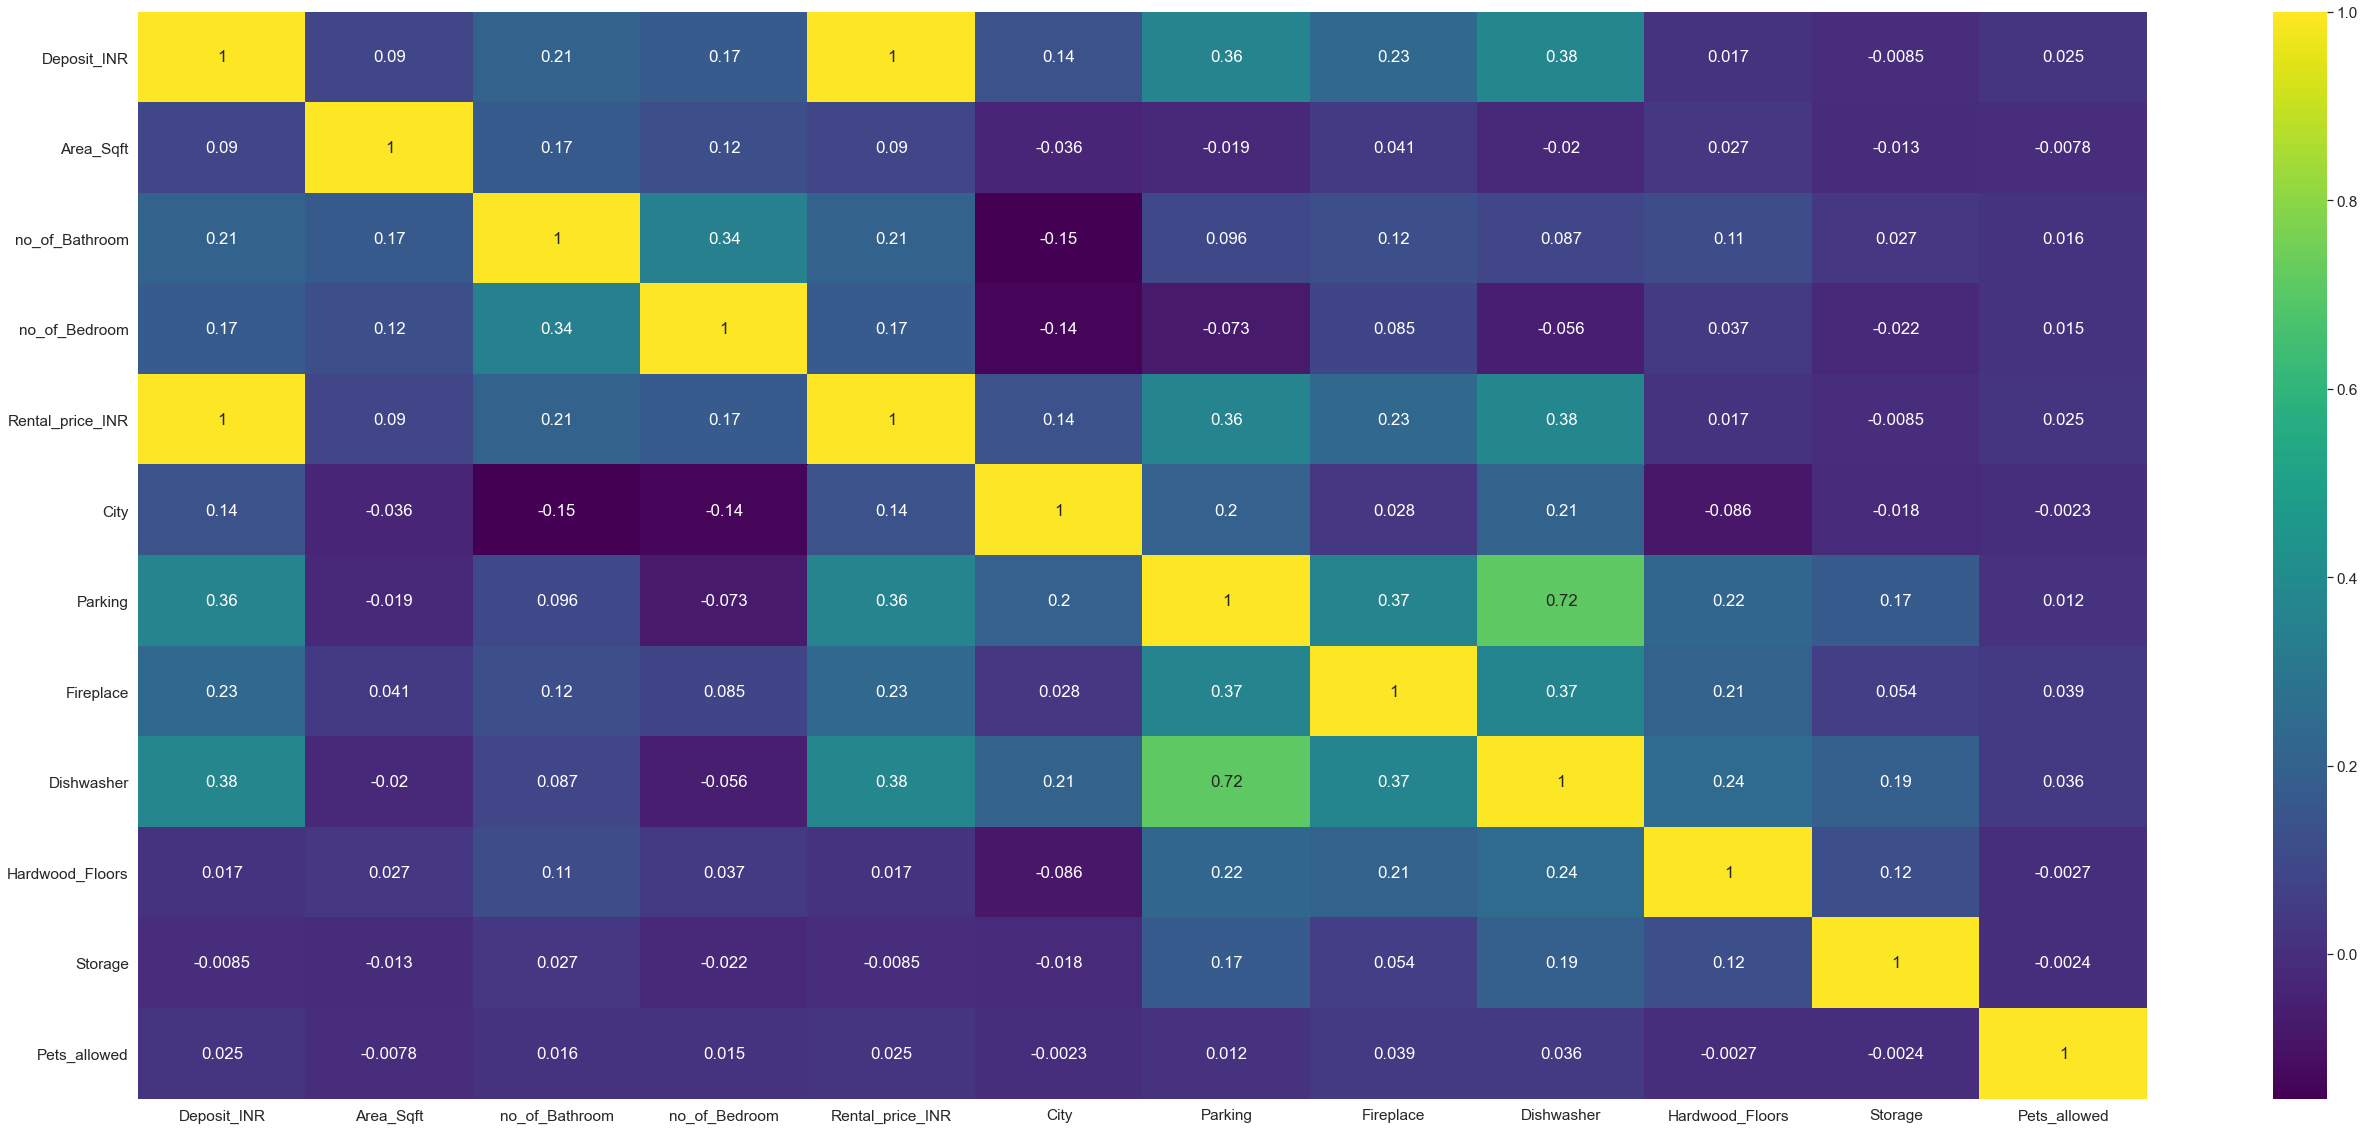

In [83]:
# Visualizing correlation of the dataset in heatmap

plt.figure(figsize=(45,20))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

<function matplotlib.pyplot.show(close=None, block=None)>

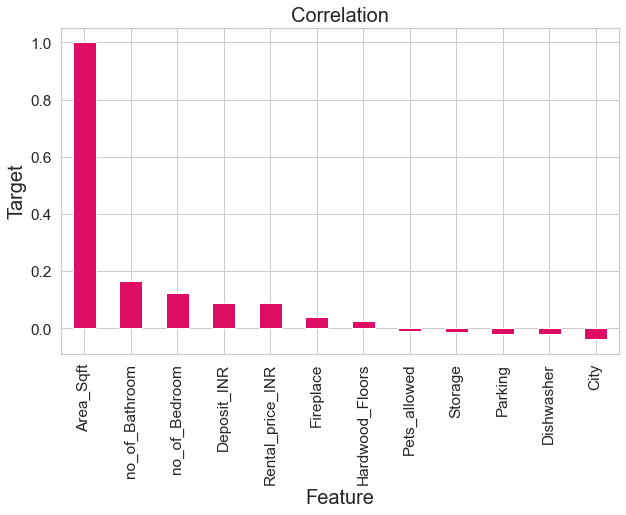

In [84]:
# Visualizing the correlation of the features with target variable price range

plt.figure(figsize=(10,6))
df.corr()['Area_Sqft'].sort_values(ascending=False).plot(kind='bar',color='#de0c62')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation',fontsize=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

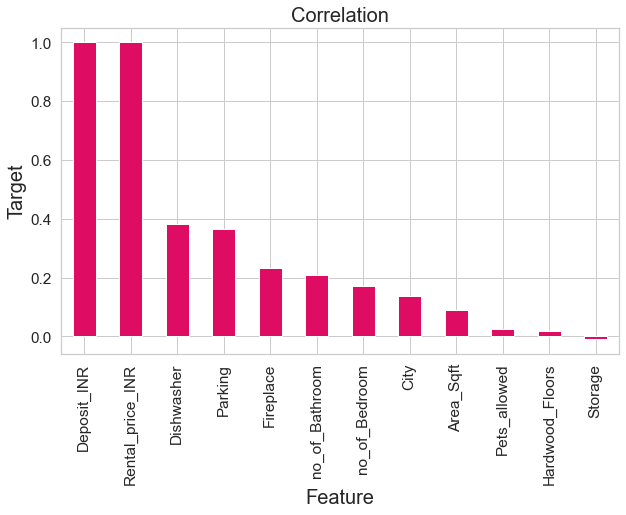

In [85]:
# Visualizing the correlation of the features with target variable price range

plt.figure(figsize=(10,6))
df.corr()['Rental_price_INR'].sort_values(ascending=False).plot(kind='bar',color='#de0c62')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation',fontsize=20)
plt.show

In [86]:
df.corr()['Rental_price_INR'].sort_values()

Storage            -0.008541
Hardwood_Floors     0.016546
Pets_allowed        0.025073
Area_Sqft           0.089529
City                0.138576
no_of_Bedroom       0.172149
no_of_Bathroom      0.208389
Fireplace           0.232168
Parking             0.364856
Dishwasher          0.381397
Deposit_INR         1.000000
Rental_price_INR    1.000000
Name: Rental_price_INR, dtype: float64

The column 'Hardwood_Floors, Pets_allowed, Area_Sqft , City, no_of_Bedroom , no_of_Bathroom,
Fireplace,Parking   ,Dishwasher,Deposit_INR are positively correlated with target variable The column  
Storage is negatively correlated with target variable'


In [88]:
from scipy.stats import zscore

col =['Area_Sqft', 'City', 'no_of_Bedroom', 'no_of_Bathroom', 'Fireplace', 'Parking','Dishwasher','Deposit_INR',
      'Rental_price_INR']

df1=df[col]
df1.head(5)

,Area_Sqft,City,no_of_Bedroom,no_of_Bathroom,Fireplace,Parking,Dishwasher,Deposit_INR,Rental_price_INR
0,630,2193,1,1,0,0,0,92928,92928
1,654,2193,1,1,0,0,0,67327,67327
2,1978,409,3,2,0,0,0,265984,265984
3,5079,2087,5,4,0,0,0,477940,477940
4,576,1765,1,1,0,0,0,124680,124680


In [89]:
z = np.abs(zscore(df1))
threshold=3

In [90]:
df_new = df[(z<3).all(axis=1)]

In [91]:
df.shape

(5721, 12)

In [93]:
df_new.shape

(5256, 12)

In [94]:
# Data Loss

data_loss =  (df.shape[0]-df_new.shape[0])/df.shape[0]*100
data_loss

8.127949659150497

In [95]:
# Checking skewness
df_new.skew().sort_values(ascending=False)[np.abs(df_new.skew())>0.5]

Pets_allowed        72.498276
Hardwood_Floors      8.193460
Storage              7.921570
Deposit_INR          2.400716
Rental_price_INR     2.400716
Area_Sqft            2.305804
Dishwasher           1.698731
Parking              1.589789
no_of_Bathroom       1.172278
no_of_Bedroom        0.558083
dtype: float64

In [97]:
# Removing skewness using power transform 
from sklearn.preprocessing import PowerTransformer 
skew =['Rental_price_INR','Deposit_INR','Storage','Hardwood_Floors']
pt = PowerTransformer(method='yeo-johnson',standardize=False)
df_new[skew] = pt.fit_transform(df_new[skew].values)

In [98]:
df_new.skew().sort_values(ascending=False)

Pets_allowed        72.498276
Hardwood_Floors      8.193460
Storage              7.921570
Area_Sqft            2.305804
Dishwasher           1.698731
Parking              1.589789
no_of_Bathroom       1.172278
no_of_Bedroom        0.558083
Deposit_INR          0.302267
Rental_price_INR     0.302267
Fireplace            0.000000
City                -0.300754
dtype: float64

In [101]:
# Dropping the feature Is delivering now
df_new.drop(['Pets_allowed'],axis=1,inplace=True)

In [106]:
# Applying sqrt transformation method to the feature Average Cost for two
df_new['Area_Sqft']= np.sqrt(df_new['Area_Sqft'])

In [ ]:
# Applying sqrt transformation method to the feature Average Cost for two
df_new['Storage']= np.sqrt(df_new['Storage'])

In [107]:
df_new.skew()

Deposit_INR         0.302267
Area_Sqft           0.481512
no_of_Bathroom      1.172278
no_of_Bedroom       0.558083
Rental_price_INR    0.302267
City               -0.300754
Parking             1.589789
Fireplace           0.000000
Dishwasher          1.698731
Hardwood_Floors     8.193460
Storage             7.921570
dtype: float64

In [108]:
x = df_new.drop('Rental_price_INR',axis=1)
x.head(5)

,Deposit_INR,Area_Sqft,no_of_Bathroom,no_of_Bedroom,City,Parking,Fireplace,Dishwasher,Hardwood_Floors,Storage
0,135.395591,25.099801,1,1,2193,0,0,0,-0.0,-0.0
1,121.215661,25.573424,1,1,2193,0,0,0,-0.0,-0.0
2,193.934427,44.474712,2,3,409,0,0,0,-0.0,-0.0
3,236.717863,71.267103,4,5,2087,0,0,0,-0.0,-0.0
4,149.735763,24.000000,1,1,1765,0,0,0,-0.0,-0.0


In [110]:
# Splitting the target variable for train, test
y = df_new['Rental_price_INR']
y.shape

(5256,)

In [111]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

m = ['Deposit_INR','Area_Sqft','City']

st= StandardScaler()
x[m] = st.fit_transform(x[m].values)
x.sample(5)

,Deposit_INR,Area_Sqft,no_of_Bathroom,no_of_Bedroom,City,Parking,Fireplace,Dishwasher,Hardwood_Floors,Storage
2748,-0.738313,0.201421,1,2,-1.735980,0,0,0,-0.0,-0.0
1151,-0.164938,0.806774,2,3,-1.201351,0,0,0,-0.0,-0.0
1462,-0.382906,-0.395146,2,1,-1.570810,0,0,0,-0.0,-0.0
3920,2.260212,-0.112354,2,2,1.071041,0,0,0,-0.0,-0.0
2025,-0.353885,1.155804,2,4,-0.732790,0,0,0,-0.0,-0.0


In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif.sort_values(by ='VIF Factor', ascending = False))
vif(x)

,Column Name,VIF Factor
2,no_of_Bathroom,5.260473
3,no_of_Bedroom,4.940734
7,Dishwasher,2.552354
5,Parking,2.452007
0,Deposit_INR,1.381790
1,Area_Sqft,1.371969
4,City,1.237367
8,Hardwood_Floors,1.110179
9,Storage,1.086680
6,Fireplace,NaN


In [113]:
# Importing required libraries

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
import pickle
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

In [114]:
def random_st_reg(model):
    max_score = 0
    max_rs = 0
    print('\n',model)
    for i in range(1,50):
        x_train, x_test,y_train,y_test= train_test_split(x,y,test_size = 0.20, random_state = i)
        model.fit(x_train,y_train)
        pred_test = model.predict(x_test)
        score = r2_score(y_test,pred_test)
        if score > max_score:
            max_score = score
            max_rs = i
    print("At random state ", max_rs, 'the model is having accuracy score of ', max_score)
    return max_rs

In [115]:
def model_fit_reg(model, rs):
    x_train, x_test,y_train,y_test= train_test_split(x,y,test_size = 0.20, random_state = rs)
    model.fit(x_train,y_train)
    pred_test = model.predict(x_test)
    r2 = r2_score(y_test,pred_test)
    mse = mean_squared_error(y_test,pred_test)
    mae = mean_absolute_error(y_test,pred_test)
    cv_score = cross_val_score(model,x,y, cv = 8)
    cv_mean = cv_score.mean()
    print("\n R2 score is ", r2)
    print("-"*50)
    print("Mean Sqaured Error is ",mse)
    print("-"*50)
    print("Mean Absolute Error is ",mae)
    print("-"*50)
    print("The cv score is ", cv_mean, "and the R2 score  is ",r2)
    print(f'\n Difference between accuracy score and cross val score {(r2-cv_mean)*100:.2f}')
    print("-"*50)

In [116]:
def model_reg(m):
    m_rs = random_st_reg(m)
    model_fit_reg(m,m_rs)

In [117]:
models  = [LinearRegression(), KNeighborsRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(n_estimators=100),
          AdaBoostRegressor(), GradientBoostingRegressor(), ExtraTreesRegressor(), XGBRegressor()]

In [118]:
for i in models:
    model_reg(i)


 LinearRegression()
At random state  1 the model is having accuracy score of  1.0

 R2 score is  1.0
--------------------------------------------------
Mean Sqaured Error is  8.625039413109909e-27
--------------------------------------------------
Mean Absolute Error is  6.993497458369306e-14
--------------------------------------------------
The cv score is  1.0 and the R2 score  is  1.0

 Difference between accuracy score and cross val score 0.00
--------------------------------------------------

 KNeighborsRegressor()
At random state  46 the model is having accuracy score of  0.979330435480508

 R2 score is  0.979330435480508
--------------------------------------------------
Mean Sqaured Error is  51.222454526762704
--------------------------------------------------
Mean Absolute Error is  4.671896478300261
--------------------------------------------------
The cv score is  0.926178244591259 and the R2 score  is  0.979330435480508

 Difference between accuracy score and cross val

HyperParameter Tuning

In [119]:
# Hyper Parameter Tuning for ExtraTreesRegressor

grid_params={'n_estimators':[100,150,200],'criterion':['squared_error','friedman_mse'],
             'min_samples_split':[2,4,5,6],'min_samples_leaf':[1,2],'max_depth':[50,100,120,150]}          
        
grid = GridSearchCV(ExtraTreesRegressor(),param_grid=grid_params)

In [120]:
grid.fit(x,y)

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [50, 100, 120, 150],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 5, 6],
                         'n_estimators': [100, 150, 200]})

In [121]:
grid.best_score_

0.982155461083868

In [122]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 120,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [123]:
final_model_reg= ExtraTreesRegressor(n_estimators = 100,criterion = 'friedman_mse',max_depth = 120,max_features = 'sqrt',min_samples_leaf = 1,min_samples_split = 4)
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 17)
final_model_reg.fit(x_train, y_train)
pred_reg= final_model_reg.predict(x_test)
print('R2 Score',r2_score(y_test,pred_reg))
print('Mean Squared Error',mean_squared_error(y_test,pred_reg))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_reg))
cv_score = cross_val_score(final_model_reg,x,y)
cv_mean =cv_score.mean()
print('CV score is ', cv_mean)

R2 Score 0.9857899348108338
Mean Squared Error 34.26809384208135
Mean Absolute Error 2.9617805498905243
CV score is  0.9369733125449233


In [124]:
import pickle

filename = 'real_estate_Rental_price_INR_ regression model.pkl'
pickle.dump(final_model_reg,open(filename,'wb'))

In [126]:
original = np.array(y_test)
predicted = np.array(final_model_reg.predict(x_test))

predrainfal = pd.DataFrame({'Original_Rental_price':original,'Predicted_Rental_price':predicted})
predrainfal.sample(20)

,Original_Rental_price,Predicted_Rental_price
767,206.671487,201.056602
445,204.990082,209.091587
696,191.848188,190.926795
164,235.819427,235.396908
709,173.084140,169.892020
544,237.595815,239.396460
379,160.867491,162.462977
103,207.446530,214.638513
397,232.084540,232.871112
434,187.537532,188.067981


Area_sqft prediction model

In [127]:
from scipy.stats import zscore

col =['Area_Sqft', 'City', 'no_of_Bedroom', 'no_of_Bathroom', 'Fireplace', 'Parking','Dishwasher','Deposit_INR',
      'Rental_price_INR']
df2=df[col]
df2.head(5)

,Area_Sqft,City,no_of_Bedroom,no_of_Bathroom,Fireplace,Parking,Dishwasher,Deposit_INR,Rental_price_INR
0,630,2193,1,1,0,0,0,92928,92928
1,654,2193,1,1,0,0,0,67327,67327
2,1978,409,3,2,0,0,0,265984,265984
3,5079,2087,5,4,0,0,0,477940,477940
4,576,1765,1,1,0,0,0,124680,124680


In [128]:
z = np.abs(zscore(df2))
threshold=3

In [129]:
df2 = df[(z<3).all(axis=1)]

In [130]:
df.shape

(5721, 12)

In [131]:
df2.shape

(5256, 12)

In [132]:
data_loss = (df.shape[0]-df2.shape[0])/df.shape[0]*100
data_loss

8.127949659150497

In [133]:
# Correlation check with target variable

df2.corr()['Area_Sqft'].sort_values()

City               -0.314044
Dishwasher         -0.098834
Parking            -0.094982
Storage            -0.026159
Pets_allowed       -0.016994
Hardwood_Floors     0.043852
Deposit_INR         0.184903
Rental_price_INR    0.184903
no_of_Bathroom      0.491577
no_of_Bedroom       0.512820
Area_Sqft           1.000000
Fireplace                NaN
Name: Area_Sqft, dtype: float64

Features City,Dishwasher, Parking , Storage  are negatively correlated with target variable 'Area_Sqft'
Features Hardwood_Floors , Deposit_INR, Rental_price_INR , no_of_Bathroom , no_of_Bedroom 
 are positively correlated with the target 


In [134]:
df2.skew()

Deposit_INR          2.400716
Area_Sqft            2.305804
no_of_Bathroom       1.172278
no_of_Bedroom        0.558083
Rental_price_INR     2.400716
City                -0.300754
Parking              1.589789
Fireplace            0.000000
Dishwasher           1.698731
Hardwood_Floors      8.193460
Storage              7.921570
Pets_allowed        72.498276
dtype: float64

In [136]:
# Removing skewness using power transform
from sklearn.preprocessing import PowerTransformer 

skew2 =['Storage','Deposit_INR','Area_Sqft','Rental_price_INR','Hardwood_Floors']

pt = PowerTransformer(method='yeo-johnson',standardize=False)
df2[skew2] = pt.fit_transform(df2[skew2].values)

In [137]:
df2.skew()

Deposit_INR          0.302267
Area_Sqft            0.096032
no_of_Bathroom       1.172278
no_of_Bedroom        0.558083
Rental_price_INR     0.302267
City                -0.300754
Parking              1.589789
Fireplace            0.000000
Dishwasher           1.698731
Hardwood_Floors      8.193460
Storage              7.921570
Pets_allowed        72.498276
dtype: float64

In [138]:
# Dropping the feature Is delivering now

df2.drop(['Pets_allowed'],axis=1,inplace=True)

In [139]:
df2.skew()

Deposit_INR         0.302267
Area_Sqft           0.096032
no_of_Bathroom      1.172278
no_of_Bedroom       0.558083
Rental_price_INR    0.302267
City               -0.300754
Parking             1.589789
Fireplace           0.000000
Dishwasher          1.698731
Hardwood_Floors     8.193460
Storage             7.921570
dtype: float64

In [141]:
x2 = df2.drop("Area_Sqft",axis=1)
x2.sample(5)

,Deposit_INR,no_of_Bathroom,no_of_Bedroom,Rental_price_INR,City,Parking,Fireplace,Dishwasher,Hardwood_Floors,Storage
3179,152.057263,1,1,152.057263,3732,0,0,0,-0.0,-0.0
701,185.307804,2,3,185.307804,119,0,0,0,-0.0,-0.0
2736,143.138804,1,1,143.138804,1098,0,0,0,-0.0,-0.0
2181,130.313326,1,2,130.313326,497,0,0,0,-0.0,-0.0
5665,150.507709,1,1,150.507709,3675,0,0,0,-0.0,-0.0


In [142]:
y2 = df2['Area_Sqft']
y2.shape

(5256,)

In [143]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

m2 = ['Deposit_INR','Rental_price_INR','City']

st = StandardScaler()
x2[m2] = st.fit_transform(x2[m2].values)
x2.sample(5)

,Deposit_INR,no_of_Bathroom,no_of_Bedroom,Rental_price_INR,City,Parking,Fireplace,Dishwasher,Hardwood_Floors,Storage
2046,-0.325309,2,3,-0.325309,-1.804656,0,0,0,-0.0,-0.0
450,0.194886,2,2,0.194886,-1.015317,0,0,0,-0.0,-0.0
3157,-0.510077,1,1,-0.510077,0.906740,0,0,0,-0.0,-0.0
4927,-0.334914,1,2,-0.334914,0.391236,0,0,0,-0.0,-0.0
4692,-0.272490,1,1,-0.272490,1.184052,0,0,0,-0.0,-0.0


In [144]:
vif(x2)

,Column Name,VIF Factor
0,Deposit_INR,inf
3,Rental_price_INR,inf
1,no_of_Bathroom,5.260441
2,no_of_Bedroom,4.816988
7,Dishwasher,2.506487
5,Parking,2.426484
4,City,1.115546
8,Hardwood_Floors,1.102634
9,Storage,1.086658
6,Fireplace,NaN


In [146]:
# Importing required libraries

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
import pickle
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

In [147]:
def random_st_reg(model):
    max_score = 0
    max_rs = 0
    print('\n',model)
    for i in range(1,50):
        x_train, x_test,y_train,y_test= train_test_split(x2,y2,test_size = 0.20, random_state = i)
        model.fit(x_train,y_train)
        pred_test = model.predict(x_test)
        score = r2_score(y_test,pred_test)
        if score > max_score:
            max_score = score
            max_rs = i
    print("At random state ", max_rs, 'the model is having accuracy score of ', max_score)
    return max_rs

In [149]:
def model_fit_reg(model, rs):
    x_train, x_test,y_train,y_test= train_test_split(x2,y2,test_size = 0.20, random_state = rs)
    model.fit(x_train,y_train)
    pred_test = model.predict(x_test)
    r2 = r2_score(y_test,pred_test)
    mse = mean_squared_error(y_test,pred_test)
    mae = mean_absolute_error(y_test,pred_test)
    cv_score = cross_val_score(model,x2,y2, cv = 8)
    cv_mean = cv_score.mean()
    print("\n R2 score is ", r2)
    print("-"*50)
    print("Mean Sqaured Error is ",mse)
    print("-"*50)
    print("Mean Absolute Error is ",mae)
    print("-"*50)
    print("The cv score is ", cv_mean, "and the R2 score  is ",r2)
    print(f'\n Difference between accuracy score and cross val score {(r2-cv_mean)*100:.2f}')
    print("-"*50)

In [150]:
def model_reg(m):
    m_rs = random_st_reg(m)
    model_fit_reg(m,m_rs)

In [151]:
models  = [LinearRegression(), KNeighborsRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(n_estimators=100),
          AdaBoostRegressor(), GradientBoostingRegressor(), ExtraTreesRegressor(), XGBRegressor()]

In [152]:
for i in models:
    model_reg(i)


 LinearRegression()
At random state  15 the model is having accuracy score of  0.5142804685723483

 R2 score is  0.5142804685723483
--------------------------------------------------
Mean Sqaured Error is  59.91098725189696
--------------------------------------------------
Mean Absolute Error is  5.297521485134257
--------------------------------------------------
The cv score is  0.15509555441170808 and the R2 score  is  0.5142804685723483

 Difference between accuracy score and cross val score 35.92
--------------------------------------------------

 KNeighborsRegressor()
At random state  41 the model is having accuracy score of  0.5708244055482018

 R2 score is  0.5708244055482018
--------------------------------------------------
Mean Sqaured Error is  46.843831198337355
--------------------------------------------------
Mean Absolute Error is  4.666248970005374
--------------------------------------------------
The cv score is  0.16564155054163912 and the R2 score  is  0.570824

In [155]:
# Hyper Parameter Tuning for ExtraTreesRegressor

grid_params={'n_estimators':[100,150,200],'criterion':['squared_error','friedman_mse'],
             'min_samples_split':[2,4,5,6],'min_samples_leaf':[1,2],'max_depth':[50,100,120,150]}          
        
grid = GridSearchCV(GradientBoostingRegressor(),param_grid=grid_params)


In [156]:
grid.fit(x2,y2)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [50, 100, 120, 150],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 5, 6],
                         'n_estimators': [100, 150, 200]})

In [157]:
grid.best_score_

-0.144244115808796

In [158]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 150,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [159]:
final_model_reg2= GradientBoostingRegressor(n_estimators = 200,criterion = 'friedman_mse',max_depth = 150,max_features = 'sqrt',min_samples_leaf = 2,min_samples_split = 6)
x_train, x_test,y_train,y_test = train_test_split(x2,y2,test_size = 0.20, random_state = 9)
final_model_reg2.fit(x_train, y_train)
pred_reg= final_model_reg.predict(x_test)
print('R2 Score',r2_score(y_test,pred_reg))
print('Mean Squared Error',mean_squared_error(y_test,pred_reg))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_reg))
cv_score = cross_val_score(final_model_reg,x2,y2)
cv_mean =cv_score.mean()
print('CV score is ', cv_mean)

R2 Score -221.5034171451535
Mean Squared Error 25587.894604647867
Mean Absolute Error 155.12290779012335
CV score is  0.09660577084257263


In [161]:
import pickle

filename = 'Real_estate_final_model_reg2_Area_sqft.pkl'
pickle.dump(final_model_reg2,open(filename,'wb'))

In [160]:
original = np.array(y_test)
predicted = np.array(final_model_reg2.predict(x_test))

predrainfal = pd.DataFrame({'Original_Area_sqft':original,'Predicted_v':predicted})
predrainfal.sample(20)

,Original_Area_sqft,Predicted_v
885,31.699646,30.571082
413,30.390859,29.024759
1034,30.587936,31.884945
993,36.213695,34.357538
393,22.626819,22.579256
280,29.899082,25.955015
235,36.088000,35.085049
1020,42.755609,35.415930
448,53.003074,41.160268
251,31.699646,35.028808
